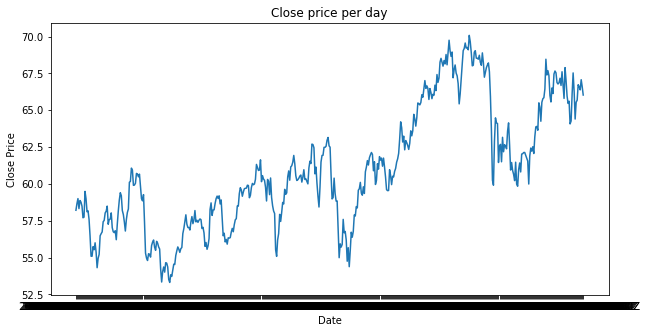

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#1. load the training data
data = pd.read_csv('JPM 2014-2016 1D.csv')

plt.plot(data.time,data.close)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close price per day')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

In [7]:
data['K'] = data['%K']
data['D'] = data['%D']

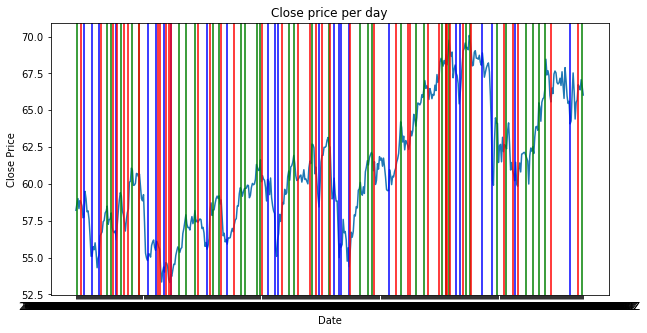

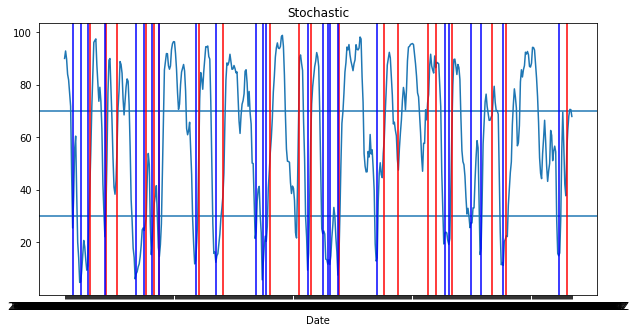

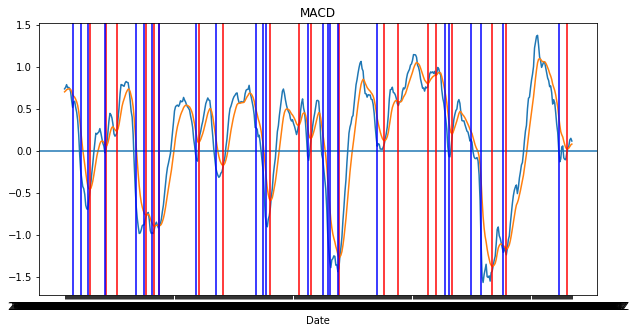

In [8]:
#Investopedia strategy: https://www.investopedia.com/articles/trading/08/macd-stochastic-double-cross.asp
# Plot crossovers for both MACD and Stochastic on the close price graph
plt.plot(data.time,data.close)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close price per day')
plt.rcParams['figure.figsize'] = [10, 5]

l = [] #MACD buy
d = [] #Stoch buy

h = [] #MACD sell
g = [] #Stoch sell

for i in range(len(data) - 1):
    date = data.time.values[i]
    #buy-in
        #check if stochastic crossover AND that it occurs below 40-line
        #to catch longer price move
    if((data.K[i]<data.D[i] and data.K[i+1]>data.D[i+1]) and (data.K[i+1] < 40 and data.D[i+1] < 40)): 
        d.append(i)
        plt.axvline(x=i, color='blue')

        #MACD crossover within two days after stoch crossover 
        #macd crosses over signal AND histogram value (is already or) moves higher than 0
    if((data.MACD[i]<data.Signal[i] and data.MACD[i+1]>data.Signal[i+1]) and data.Histogram[i+1]>0): 
        plt.axvline(x=i, color='red')
        l.append(i)
    #-------------------------------------------------------      
    #buy-out
        #check if stochastic crossover AND that it occurs above 60-line
        #to catch longer price move
    if((data.K[i]>data.D[i] and data.K[i+1]<data.D[i+1]) and (data.K[i+1] > 60 and data.D[i+1] > 60)): 
        g.append(i)
        plt.axvline(x=i, color='green')
        #MACD crossover within two days after stoch crossover 
        #macd crosses over signal AND histogram value (is already or) moves lower than 0
    if((data.MACD[i]>data.Signal[i] and data.MACD[i+1]<data.Signal[i+1]) and data.Histogram[i+1]<0): 
        plt.axvline(x=i, color='red')
        h.append(i)
        
plt.show()

#--------------------------------------------------------------
#Plot Stochastic data
plt.plot(data.time,data.K)
#plt.plot(data.D)
plt.axhline(y=30)
plt.axhline(y=70)

for i in l:
    plt.axvline(x=i, color='red')
    
for i in d:    
    plt.axvline(x=i, color='blue')

plt.xlabel('Date')
plt.title('Stochastic')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

#------------------------------------------------------------
#Plot MACD data
plt.plot(data.time,data.MACD)
plt.plot(data.Signal)
plt.axhline(y=0)


for i in l:
    plt.axvline(x=i, color='red')
for i in d:    
    plt.axvline(x=i, color='blue')
    
plt.xlabel('Date')
plt.title('MACD')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()


Plotting Buy-in and Buy-Out Periods

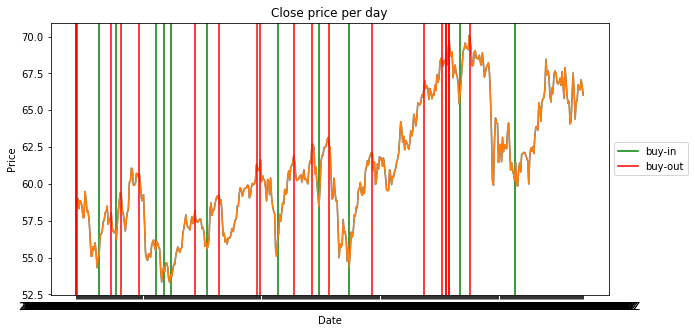

In [9]:
import csv
wtr = csv.writer(open ('out.csv', 'w'), delimiter=',', lineterminator='\n')
out = []

a =[] #buy-in
for i in d:
    for j in l:
        if(abs(i - j) <= 4):
            a.append(i)
            out.append(data.time[i])
plt.plot(data.time,data.close)
for i in a:
    plt.axvline(x=i, color='green')
plt.axvline(color='green', label='buy-in')
#---------------------------------
b=[] #buy-out
for i in g:
    for j in h:
        if(abs(i - j) <= 4):
            b.append(i)
            out.append(data.time[i])
plt.plot(data.time,data.close)
for i in b:
    plt.axvline(x=i, color='red')
plt.axvline(color='red', label='buy-out')
#--------------------------------
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close price per day')
plt.rcParams['figure.figsize'] = [10, 5]
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

for x in out : wtr.writerow ([x])